In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the API key.
from config import weather_api_key

## CREATE RANDOM LAT AND LONG

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

## Use CITYPY to find nearest city and add to a new list

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
import requests

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c9f90f5546dd92066ec3d4267557b20


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aksaray
Processing Record 2 of Set 1 | cap malheureux
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | joshimath
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | komsomolskiy
Processing Record 8 of Set 1 | xining
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | paramonga
Processing Record 12 of Set 1 | qaqortoq
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | zhanjiang
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | marsh harbour
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | golden
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | airai
Processing Record 22 of Set 1 | jamestown
Processing R

Processing Record 38 of Set 4 | fraserburgh
Processing Record 39 of Set 4 | esperance
Processing Record 40 of Set 4 | marcona
City not found. Skipping...
Processing Record 41 of Set 4 | castro
Processing Record 42 of Set 4 | poli
Processing Record 43 of Set 4 | bereda
Processing Record 44 of Set 4 | karlskrona
Processing Record 45 of Set 4 | souillac
Processing Record 46 of Set 4 | vila velha
Processing Record 47 of Set 4 | san blas
Processing Record 48 of Set 4 | dikson
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 50 of Set 4 | tecoanapa
Processing Record 1 of Set 5 | mayo
Processing Record 2 of Set 5 | iqaluit
Processing Record 3 of Set 5 | hithadhoo
Processing Record 4 of Set 5 | chicama
Processing Record 5 of Set 5 | samarai
Processing Record 6 of Set 5 | sao jose da coroa grande
Processing Record 7 of Set 5 | vila franca do campo
Processing Record 8 of Set 5 | beinamar
Processing Record 9 of Set 5 | amderma
City not found. Skipping...
Proc

Processing Record 25 of Set 8 | san quintin
Processing Record 26 of Set 8 | neuquen
Processing Record 27 of Set 8 | ola
Processing Record 28 of Set 8 | sete
Processing Record 29 of Set 8 | lezajsk
Processing Record 30 of Set 8 | inuvik
Processing Record 31 of Set 8 | camacha
Processing Record 32 of Set 8 | channel-port aux basques
Processing Record 33 of Set 8 | amga
Processing Record 34 of Set 8 | muros
Processing Record 35 of Set 8 | arvika
Processing Record 36 of Set 8 | katobu
Processing Record 37 of Set 8 | maningrida
Processing Record 38 of Set 8 | muscatine
Processing Record 39 of Set 8 | bambous virieux
Processing Record 40 of Set 8 | tuatapere
Processing Record 41 of Set 8 | teguldet
Processing Record 42 of Set 8 | sao gabriel da cachoeira
Processing Record 43 of Set 8 | mandawar
Processing Record 44 of Set 8 | hamilton
Processing Record 45 of Set 8 | kangaatsiaq
Processing Record 46 of Set 8 | alcantara
Processing Record 47 of Set 8 | westport
Processing Record 48 of Set 8 | 

Processing Record 15 of Set 12 | omaruru
Processing Record 16 of Set 12 | sarandi
Processing Record 17 of Set 12 | camapua
Processing Record 18 of Set 12 | puerto madryn
Processing Record 19 of Set 12 | kushmurun
Processing Record 20 of Set 12 | calama
Processing Record 21 of Set 12 | challans
Processing Record 22 of Set 12 | wageningen
Processing Record 23 of Set 12 | sur
Processing Record 24 of Set 12 | yar-sale
Processing Record 25 of Set 12 | alto vera
City not found. Skipping...
Processing Record 26 of Set 12 | west wendover
Processing Record 27 of Set 12 | totskoye
Processing Record 28 of Set 12 | ruidoso
Processing Record 29 of Set 12 | saint-joseph
Processing Record 30 of Set 12 | nyurba
Processing Record 31 of Set 12 | hualmay
Processing Record 32 of Set 12 | dryden
Processing Record 33 of Set 12 | hanzhong
Processing Record 34 of Set 12 | havre-saint-pierre
Processing Record 35 of Set 12 | takoradi
Processing Record 36 of Set 12 | nevinnomyssk
Processing Record 37 of Set 12 |

In [10]:
len(city_data)

581

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aksaray,38.3726,34.0254,29.79,38,97,0.72,TR,2021-11-15 01:06:38
1,Cap Malheureux,-19.9842,57.6142,76.46,75,93,3.00,MU,2021-11-15 01:06:39
2,Bengkulu,-3.8004,102.2655,77.68,82,94,3.49,ID,2021-11-15 01:05:56
3,Avarua,-21.2078,-159.7750,78.85,61,75,4.61,CK,2021-11-15 01:06:39
4,Joshimath,30.5667,79.5667,45.93,20,0,6.29,IN,2021-11-15 01:06:40
5,Albany,42.6001,-73.9662,43.52,70,100,3.00,US,2021-11-15 01:05:29
6,Komsomolskiy,40.4272,71.7189,48.92,53,40,13.80,UZ,2021-11-15 01:06:41
7,Xining,36.6167,101.7667,25.45,47,0,3.24,CN,2021-11-15 01:06:41
8,Kodiak,57.7900,-152.4072,31.51,59,1,9.22,US,2021-11-15 01:06:42
9,Hermanus,-34.4187,19.2345,61.90,76,100,3.74,ZA,2021-11-15 01:06:42


In [13]:
new_column_order = ["City", "Country", "Date","Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_2_df=city_data_df[new_column_order]
city_data_2_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aksaray,TR,2021-11-15 01:06:38,38.3726,34.0254,29.79,38,97,0.72
1,Cap Malheureux,MU,2021-11-15 01:06:39,-19.9842,57.6142,76.46,75,93,3.00
2,Bengkulu,ID,2021-11-15 01:05:56,-3.8004,102.2655,77.68,82,94,3.49
3,Avarua,CK,2021-11-15 01:06:39,-21.2078,-159.7750,78.85,61,75,4.61
4,Joshimath,IN,2021-11-15 01:06:40,30.5667,79.5667,45.93,20,0,6.29
...,...,...,...,...,...,...,...,...,...
576,Skelleftea,SE,2021-11-15 01:23:07,64.7507,20.9528,23.36,100,90,5.75
577,Ust-Maya,RU,2021-11-15 01:23:07,60.4167,134.5333,-8.05,94,30,2.84
578,Repalle,IN,2021-11-15 01:23:08,16.0167,80.8500,79.02,96,87,5.39
579,Tefe,BR,2021-11-15 01:23:08,-3.3542,-64.7114,75.04,95,100,2.30


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Extract Data for Plotting

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/15/21'

## SCATTER PLOT

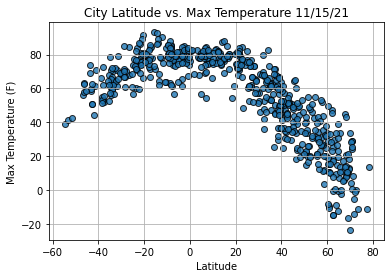

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Updating Grapth to change Y Axis

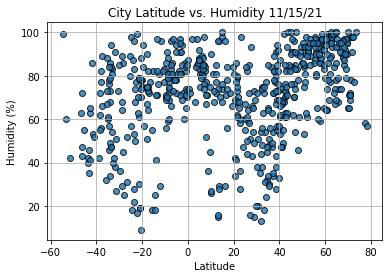

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

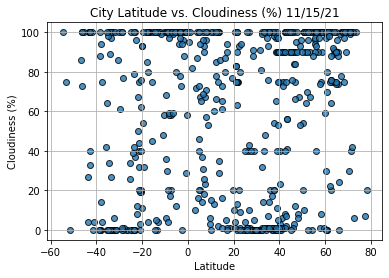

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

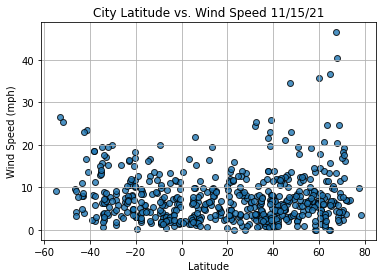

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Linear Regression

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## CREATING Hemospheres by adjusting dataframe filters

In [25]:
index13 = city_data_2_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021-11-15 01:06:44
Lat                        -33.65
Lng                      115.3333
Max Temp                    70.05
Humidity                       47
Cloudiness                     97
Wind Speed                   6.24
Name: 13, dtype: object

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aksaray,38.3726,34.0254,29.79,38,97,0.72,TR,2021-11-15 01:06:38
4,Joshimath,30.5667,79.5667,45.93,20,0,6.29,IN,2021-11-15 01:06:40
5,Albany,42.6001,-73.9662,43.52,70,100,3.00,US,2021-11-15 01:05:29
6,Komsomolskiy,40.4272,71.7189,48.92,53,40,13.80,UZ,2021-11-15 01:06:41
7,Xining,36.6167,101.7667,25.45,47,0,3.24,CN,2021-11-15 01:06:41


## Created Northern and Southern DataFrame using LOC

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Linear regression test on North & South Hemisphere

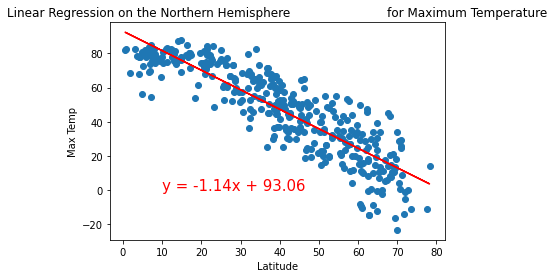

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

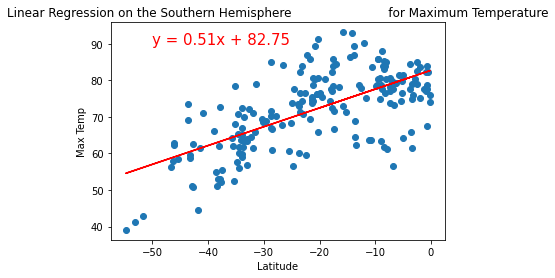

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

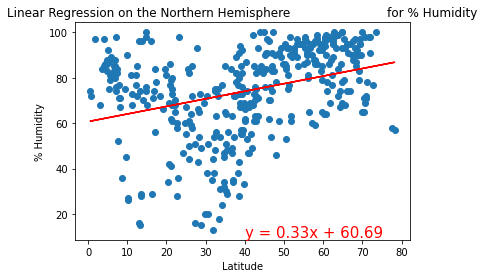

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

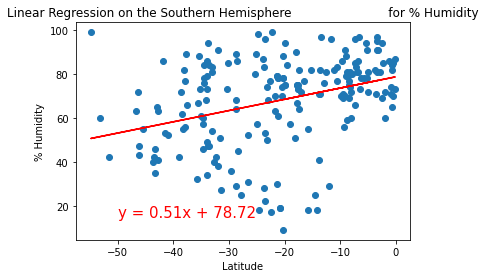

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

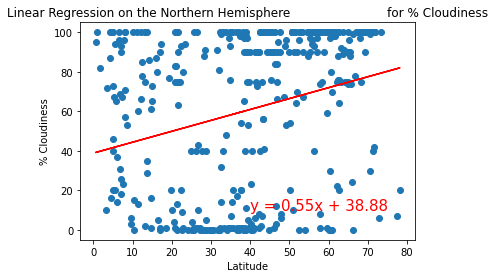

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

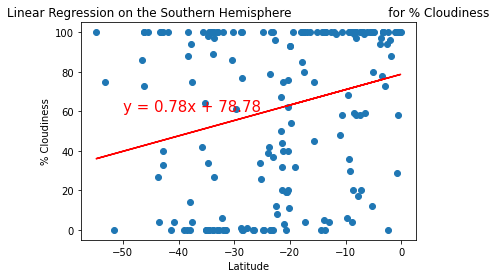

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

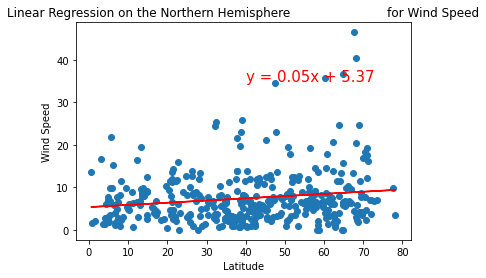

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

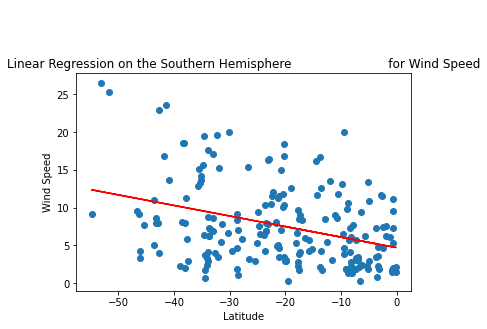

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))